<a href="https://colab.research.google.com/github/dhairyav-s/Board_Infinity/blob/master/Python_Assignment_1(23rd%20March).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

-Reading the Data

In [0]:
df=pd.read_excel('/content/Tips Quick EDA exercise v0.1 (5).xlsx')

-Checking the Overall data in the excel sheet.

In [83]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


-Checking the number of rows and columns in the data.

In [84]:
df.shape

(245, 7)

-Checking the data types of the data

In [85]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size          float64
dtype: object

-Checking for null values in the data set.

In [86]:
df.isnull().sum()

total_bill    1
tip           1
sex           0
smoker        0
day           1
time          1
size          1
dtype: int64

-Dropping the null values from the data set.

In [87]:
df=df.dropna()
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

-Checking the statistcal values of the data set.

In [88]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


1) What is the overall average tip?

2) Get a numerical summary for 'tip' - are the median and mean very different? What does this tell you about the field?

In [89]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [90]:
np.median(df['tip'])

2.9

Ans1) Avg tip is the mean value. i.e = Rs- 2.99.

Ans2) the outputs show that the mean and median are close, hence it states that there is normal distribution in the data.

3)Prepare a boxplot for 'tip', are there any outliers?

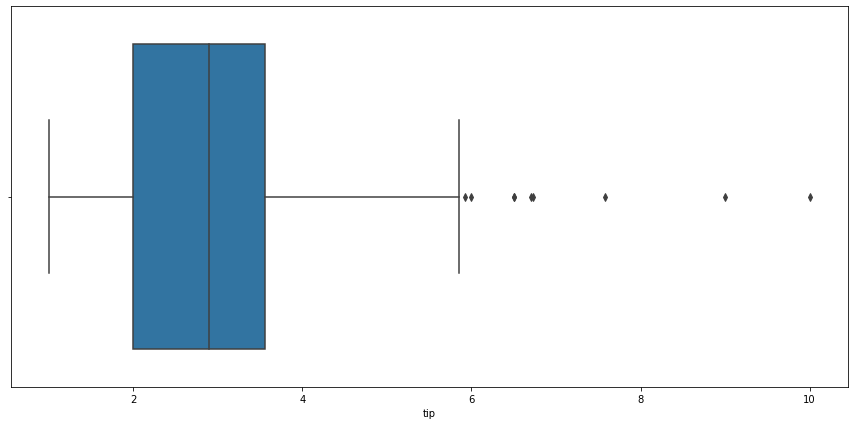

In [91]:
fig_dms=(15,7)
fig, ax=plt.subplots(figsize=fig_dms)
sns.boxplot(x=df['tip'],ax=ax)

Ans3) Yes, Outliers are present in the tips column.

4) Prepare a boxplot for 'total_bill', are there any outliers?

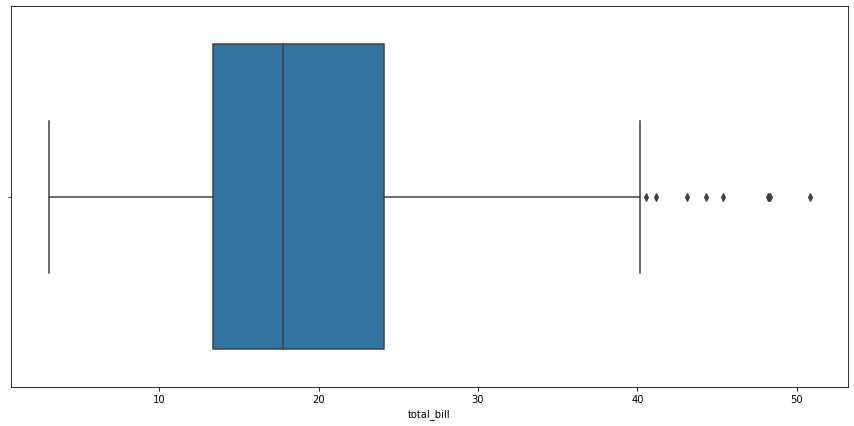

In [92]:
fig_dms=(15,7)
fig, ax=plt.subplots(figsize=fig_dms)
sns.boxplot(x=df['total_bill'],ax=ax)

Ans4) Yes, Outliers are present in the total bill column.

5) Gender: what is the percent of females in the data? 

6) Prepare a bar plot with the bars representing the percentage of records for each gender.

In [93]:
sex_counts=df['sex'].value_counts()
sex_counts

Male      157
Female     87
Name: sex, dtype: int64

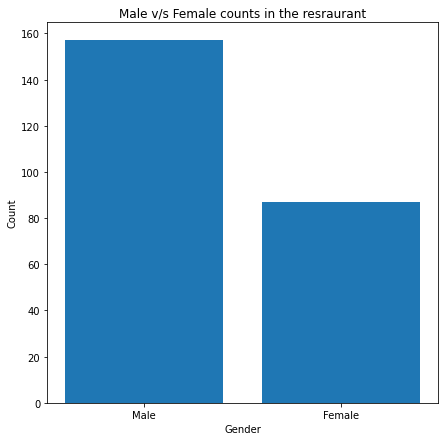

In [94]:
plt.figure(figsize=(7,7))
plt.title('Male v/s Female counts in the resraurant')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.bar(df['sex'].value_counts().keys(), df['sex'].value_counts().values)
plt.show()

7) Does the average tip differ by gender? Does one gender tip more than the other?
 

In [95]:
avg_tip_sex=df.groupby(['sex'])
avg_tip_sex.describe()['tip']


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0


Ans7)3.089-2.833=0.2
 
The difference between the mean of both the genders is 0.2. Hence we can say that male tip a little more than female customers.

8) Does the average tip differ by the time of day?

In [96]:
avg_tip_time=df.groupby(['time'])
avg_tip_time.describe()['tip']

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Dinner,176.0,3.102670,1.436243,1.00,2.0,3.00,3.6875,10.0
Lunch,68.0,2.728088,1.205345,1.25,2.0,2.25,3.2875,6.7


Ans8) 3.102670-2.728088=0.3

The difference between the mean of timingds is 0.3. Hence we can say that during the dinner the tip is a little more than lunch.

9) Does the average tip differ by size (number of people at the table)?

In [97]:
avg_tip_size=df.groupby(['size'])
avg_tip_size.describe()['tip']

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
1.0,4.0,1.437500,0.506516,1.00,1.0000,1.415,1.8525,1.92
2.0,156.0,2.582308,0.985501,1.00,2.0000,2.500,3.1450,5.85
3.0,38.0,3.393158,1.557344,1.36,2.3575,3.290,3.6825,10.00
4.0,37.0,4.135405,1.640668,2.00,3.0000,3.760,5.0700,9.00
5.0,5.0,4.028000,1.440111,2.00,3.0000,5.000,5.0000,5.14
6.0,4.0,5.225000,1.053170,4.20,4.8000,5.000,5.4250,6.70


Ans9) As we can see from the table increase in the number of people increases the tip as well. 

10) Do smokers tip more than non-smokers?

In [98]:
avg_tip_smoker=df.groupby(['smoker'])
avg_tip_smoker.describe()['tip']

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,2.991854,1.377190,1.0,2.0,2.74,3.505,9.0
Yes,93.0,3.008710,1.401468,1.0,2.0,3.00,3.680,10.0


Ans10) As we observe in the table the mean value for smokers is a little more than the mean value for non-smokers. It means the smokers do tip more than non-smokers.

11) Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most?

In [99]:
avg_group1=df.groupby(['sex','smoker','size']).describe()['tip'] 
avg_group1

count      mean       std  ...    50%     75%    max
sex    smoker size                             ...                      
Female No     1.0     2.0  1.415000  0.586899  ...  1.415  1.6225   1.83
              2.0    33.0  2.370606  0.739539  ...  2.300  3.0000   4.08
              3.0     9.0  2.918889  1.086456  ...  3.000  3.5000   4.67
              4.0     7.0  4.014286  1.124794  ...  3.750  5.0850   5.20
              5.0     1.0  5.140000       NaN  ...  5.140  5.1400   5.14
              6.0     2.0  4.600000  0.565685  ...  4.600  4.8000   5.00
       Yes    1.0     1.0  1.000000       NaN  ...  1.000  1.0000   1.00
              2.0    25.0  2.736800  1.020297  ...  2.500  3.4800   5.00
              3.0     5.0  3.846000  1.539019  ...  3.500  3.5000   6.50
              4.0     2.0  4.045000  1.350574  ...  4.045  4.5225   5.00
Male   No     2.0    57.0  2.557544  0.981170  ...  2.500  3.1800   5.85
              3.0    17.0  3.148824  1.125299  ...  3.150  3.6000   5.92
              4.0    19.0  4.262632  2.007809  ...  4.000  5.3350   9.00
              5.0     2.0  5.000000  0.000000  ...  5.000  5.0000   5.00
              6.0     2.0  5.850000  1.202082  ...  5.850  6.2750   6.70
       Yes    1.0     1.0  1.920000       NaN  ...  1.920  1.9200   1.92
              2.0    41.0  2.692927  1.135003  ...  2.200  3.1800   5.65
              3.0     7.0  4.272857  2.616516  ...  3.500  4.0000  10.00
              4.0     9.0  3.981111  1.336286  ...  3.760  4.7300   6.50
              5.0     2.0  2.500000  0.707107  ...  2.500  2.7500   3.00

[20 rows x 8 columns]

Ans11) Non-smoker male size of 6 tip the most.

12) Create a new metric called 'pct_tip' = tip/ total_bill - this would be percent tip give, and should be a better measure of the tipping behaviour.

In [103]:
df['pct_tip']=df['tip']/df['total_bill']*100
df.head()

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2.0,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3.0,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3.0,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2.0,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4.0,14.680765


13) Does pct_tip differ by gender? Does one gender tip more than the other?

In [104]:
avg_pct_sex=df.groupby(['sex']).describe()['pct_tip']
avg_pct_sex

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,87.0,16.649074,5.363173,5.643341,14.041645,15.558149,19.426621,41.666667
Male,157.0,15.765055,6.477787,3.563814,12.138869,15.349194,18.623962,71.034483


Ans13) Yes pct_tip differs by gender. Females tip % more than male tip %.

14) Does pct_tip differ by size (number of people at the table)? 

In [105]:
avg_pct_size=df.groupby(['size']).describe()['pct_tip']
avg_pct_size

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
1.0,4.0,21.729202,8.034186,13.793103,17.077869,20.275206,24.926539,32.573290
2.0,156.0,16.571919,6.684824,3.563814,13.522313,15.610418,19.503614,71.034483
3.0,38.0,15.215685,4.545887,5.643341,12.475755,15.932311,18.613473,23.074192
4.0,37.0,14.594901,4.239533,7.745933,11.774956,14.669927,16.979656,28.053517
5.0,5.0,14.149549,6.773266,6.565988,10.657194,12.138869,17.219430,24.166264
6.0,4.0,15.622920,4.215338,10.379905,13.165446,16.289124,18.746598,19.533528


Ans14) Yes pct tip differs by size.

15) Make the gender vs. smoker view using pct_tip  - does your inference change?

In [107]:
avg_group2=df.groupby(['sex','smoker','size']).describe()['pct_tip'] 
avg_group2

count       mean  ...        75%        max
sex    smoker size                    ...                      
Female No     1.0     2.0  15.982947  ...  17.077869  18.172790
              2.0    33.0  16.015156  ...  19.492158  25.267250
              3.0     9.0  15.499879  ...  18.133491  20.624632
              4.0     7.0  13.944374  ...  14.890881  15.000000
              5.0     1.0  17.219430  ...  17.219430  17.219430
              6.0     2.0  16.289124  ...  17.386706  18.484288
       Yes    1.0     1.0  32.573290  ...  32.573290  32.573290
              2.0    25.0  18.492535  ...  19.821606  41.666667
              3.0     5.0  16.871821  ...  19.611415  23.074192
              4.0     2.0  10.925197  ...  11.261717  11.598237
Male   No     2.0    57.0  16.780017  ...  19.815668  29.198966
              3.0    17.0  14.685057  ...  16.054159  22.774708
              4.0    19.0  15.061108  ...  17.700354  19.228818
              5.0     2.0  18.152566  ...  21.159415  24.166264
              6.0     2.0  14.956716  ...  17.245122  19.533528
       Yes    1.0     1.0  22.377622  ...  22.377622  22.377622
              2.0    41.0  15.559632  ...  17.967332  71.034483
              3.0     7.0  14.956009  ...  19.400812  21.378942
              4.0     9.0  14.932140  ...  19.930475  28.053517
              5.0     2.0   8.611591  ...   9.634392  10.657194

[20 rows x 8 columns]

Ans15) Single female smokers have the higher avg pct tip.

16) Make a scatter plot of total_bill vs. tip.

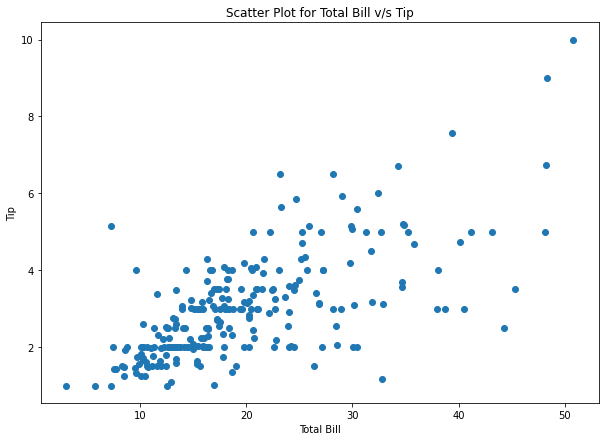

In [111]:
plt.figure(figsize=(10,7))
plt.title('Scatter Plot for Total Bill v/s Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.scatter(df['total_bill'],df['tip'])
plt.show()

17) Make a scatter plot of total_bill vs. pct_tip.

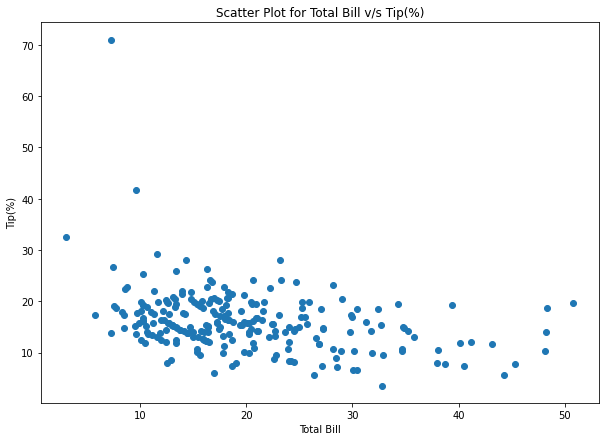

In [112]:
plt.figure(figsize=(10,7))
plt.title('Scatter Plot for Total Bill v/s Tip(%)')
plt.xlabel('Total Bill')
plt.ylabel('Tip(%)')
plt.scatter(df['total_bill'],df['pct_tip'])
plt.show()

-Thank You 

Dhairyav Shah.
DSFEB02